In [1]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import scanpy as sc
import scvi
import collections

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

from datetime import date
today = str(date.today())

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')

# %cd /nfs/team205/vk8/processed_data/muscle/data_v3

results = './write/'
sc.logging.print_version_and_date()

Global seed set to 0


Running Scanpy 1.9.1, on 2023-04-03 19:21.


/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
adata_sc = sc.read(f'{results}/ICM_scell_dbrm_scvi_v2_2023-03-06.h5ad')

In [3]:
adata_sc

AnnData object with n_obs × n_vars = 96007 × 33538
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std'
    obsm: '

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


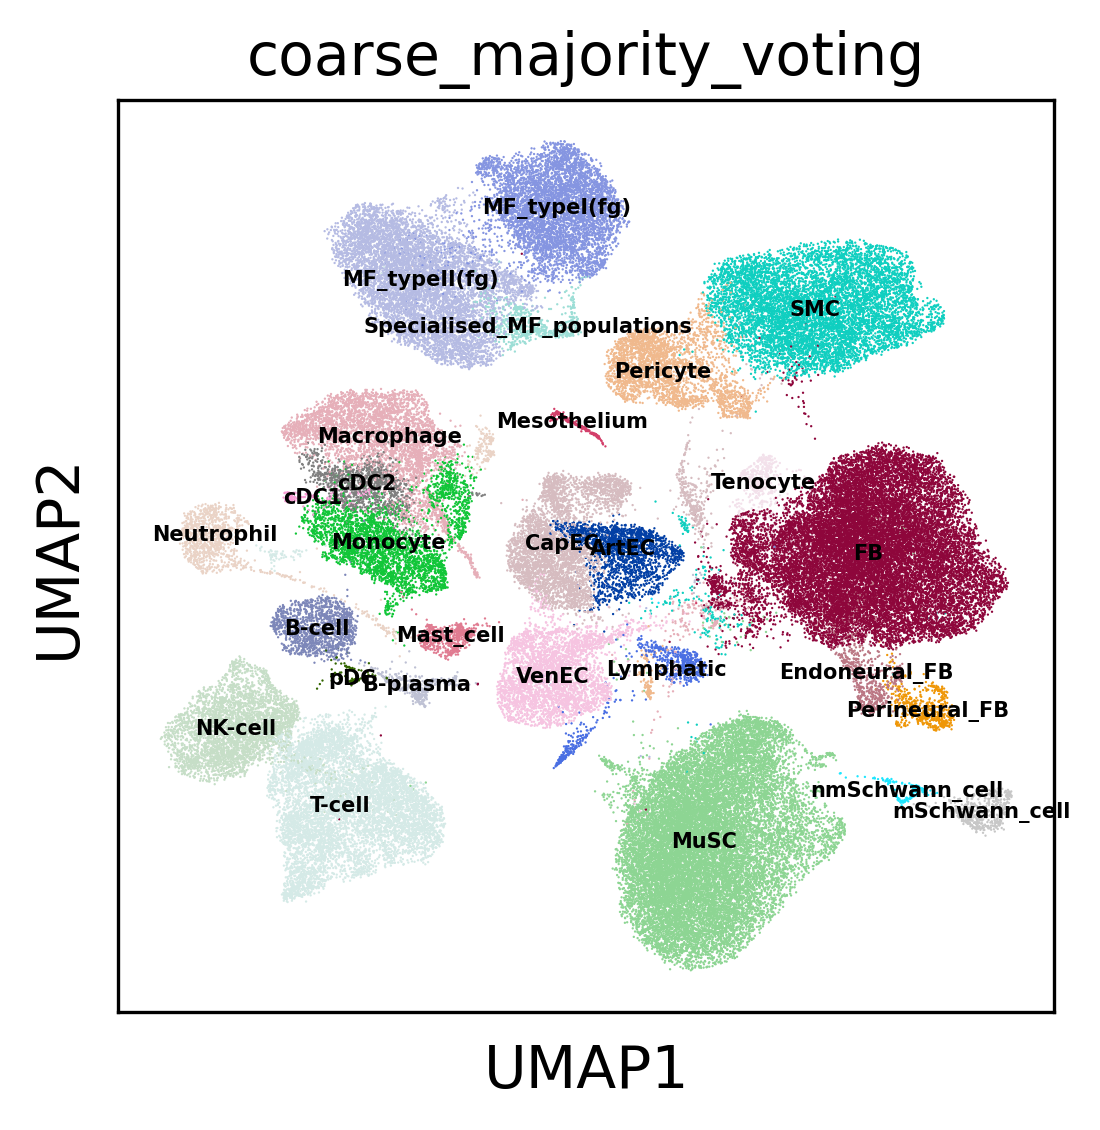

In [4]:
sc.pl.umap(adata_sc,color=['coarse_majority_voting'],legend_fontsize=5,legend_loc='on data')

In [11]:
collections.Counter(adata_sc.obs['coarse_majority_voting'])

Counter({'MF_typeI(fg)': 5219,
         'MuSC': 17907,
         'VenEC': 3279,
         'Specialised_MF_populations': 627,
         'B-plasma': 413,
         'MF_typeII(fg)': 7050,
         'ArtEC': 1923,
         'cDC1': 182,
         'FB': 19144,
         'cDC2': 1120,
         'Macrophage': 3988,
         'Lymphatic': 687,
         'SMC': 8020,
         'Monocyte': 3224,
         'Endoneural_FB': 714,
         'T-cell': 7280,
         'Perineural_FB': 547,
         'Tenocyte': 489,
         'CapEC': 3932,
         'Pericyte': 2841,
         'NK-cell': 3573,
         'Mast_cell': 502,
         'B-cell': 1264,
         'nmSchwann_cell': 150,
         'mSchwann_cell': 486,
         'pDC': 91,
         'Neutrophil': 1152,
         'Mesothelium': 203})

In [16]:
adata_scvi_MuSC = sc.read('./write/ICM_result/MuSC_cells_scvi/adata.h5ad')

In [5]:
adata_scvi_Endo = sc.read('./write/ICM_result/Endo_cells_scvi/adata.h5ad')
adata_scvi_SMC = sc.read('./write/ICM_result/SMC_cells_scvi/adata.h5ad')

In [6]:
adata_scvi_Fb = sc.read('./write/ICM_result/Fb_cells_scvi/adata.h5ad')
adata_scvi_Schwann = sc.read(f'{results}/ICM_Schwann_cells_raw_2023-03-06.h5ad')

In [7]:
adata_scvi_NKT = sc.read('./write/ICM_result/NKT_cells_scvi/adata.h5ad')
adata_scvi_B = sc.read('./write/human_SKM_v2.0_Bcell_scVI_adata.h5ad')
adata_scvi_Myeloid = sc.read('./write/ICM_result/Myeloid_cells_scvi/adata.h5ad')
adata_scvi_Mast = sc.read('./write/human_SKM_v2.0_Mast_scVI_adata.h5ad')
adata_scvi_Neutrophil = sc.read('./write/human_SKM_v2.0_Neutrophil_scVI_adata.h5ad')
adata_scvi_pDC = sc.read('./write/human_SKM_v2.0_pDC_scVI_adata.h5ad')

In [22]:
cell_list_Mesothelium = adata_sc[adata_sc.obs['coarse_majority_voting']=='Mesothelium'].obs.index

cell_list_MF1 = adata_sc[adata_sc.obs['coarse_majority_voting']=='MF_typeI(fg)'].obs.index
cell_list_MF2 = adata_sc[adata_sc.obs['coarse_majority_voting']=='MF_typeII(fg)'].obs.index
cell_list_MF3 = adata_sc[adata_sc.obs['coarse_majority_voting']=='Specialised_MF_populations'].obs.index

cell_list_MuSC = adata_scvi_MuSC.obs.index

cell_list_Endo = adata_scvi_Endo.obs.index
cell_list_SMC = adata_scvi_SMC.obs.index

cell_list_Fb = adata_scvi_Fb.obs.index
cell_list_Schwann = adata_scvi_Schwann.obs.index

cell_list_NKT = adata_scvi_NKT.obs.index
cell_list_B = adata_scvi_B.obs.index
cell_list_Myeloid = adata_scvi_Myeloid.obs.index
cell_list_Mast = adata_scvi_Mast.obs.index
cell_list_Neutrophil = adata_scvi_Neutrophil.obs.index
cell_list_pDC = adata_scvi_pDC.obs.index

cell_list_all = cell_list_Endo.append(cell_list_SMC).append(cell_list_Fb).append(cell_list_Schwann).append(cell_list_NKT).append(cell_list_B).append(cell_list_Myeloid).append(cell_list_Mast).append(cell_list_Neutrophil).append(cell_list_pDC).append(cell_list_Mesothelium).append(cell_list_MF1).append(cell_list_MF2).append(cell_list_MF3).append(cell_list_MuSC)

In [23]:
adata_clean = adata_sc[cell_list_all]

In [24]:
adata_clean

View of AnnData object with n_obs × n_vars = 90784 × 33538
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std'
   

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


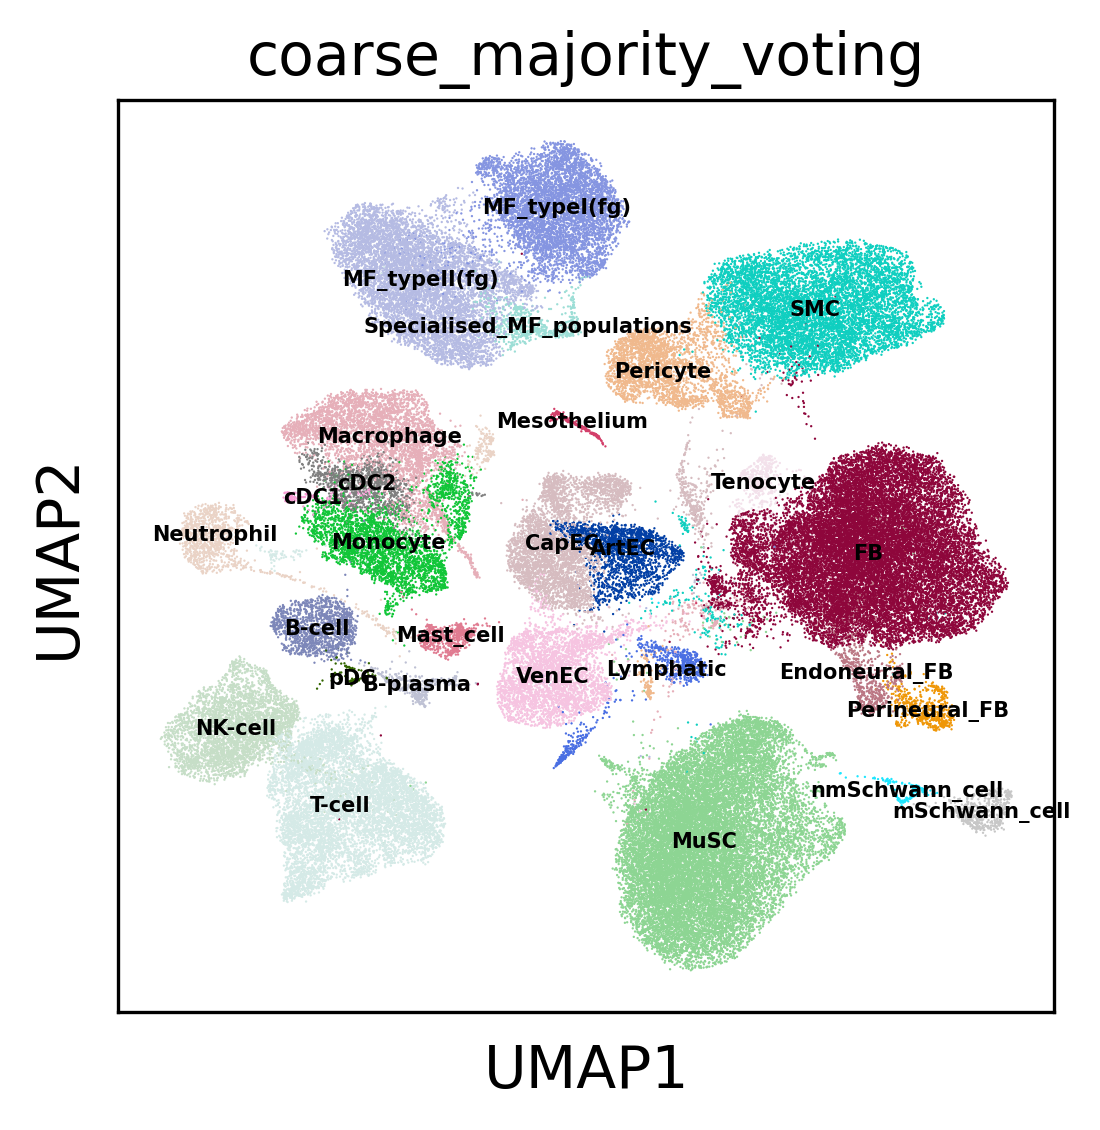

In [25]:
sc.pl.umap(adata_sc,color=['coarse_majority_voting', 'fine2_majority_voting'],legend_fontsize=5,legend_loc='on data')

In [27]:
adata_clean.write('./write/human_SKM_v2.0_single-cell_v1_adata_clean_raw.h5ad')

In [2]:
adata = sc.read('./write/human_SKM_v2.0_single-cell_v1_adata_clean_raw.h5ad')

In [3]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe

In [4]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=10000, layer="counts",batch_key='Age_group', subset = True)

scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key='SampleID',
                              categorical_covariate_keys=["DonorID", "Sex", "10X_version"],
                              continuous_covariate_keys=['percent_mito'])

vae = scvi.model.SCVI(adata,n_hidden=128, n_latent=30, n_layers=2)
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=88 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 88/88: 100%|██████████| 88/88 [17:18<00:00, 10.74s/it, loss=1.32e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=88` reached.


Epoch 88/88: 100%|██████████| 88/88 [17:18<00:00, 11.80s/it, loss=1.32e+03, v_num=1]


In [5]:
adata.write('./write/human_SKM_v2.0_single-cell_v1_adata_v1.h5ad')

In [2]:
adata = sc.read('./write/human_SKM_v2.0_single-cell_v1_adata_v1.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 90784 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std', 'highly_va

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


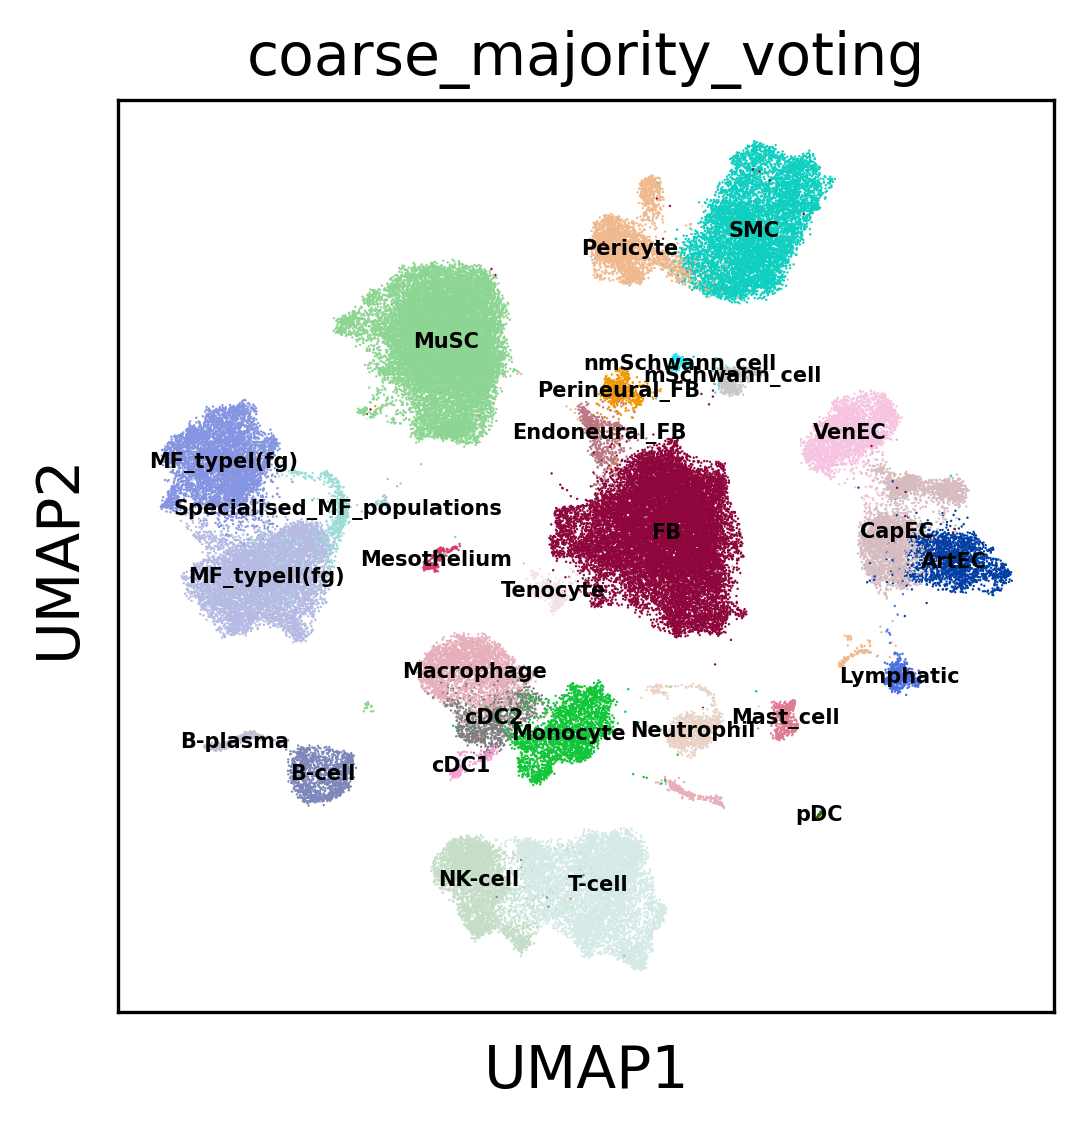

In [3]:
sc.pl.umap(adata,color=['coarse_majority_voting'],legend_fontsize=5,legend_loc='on data')

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


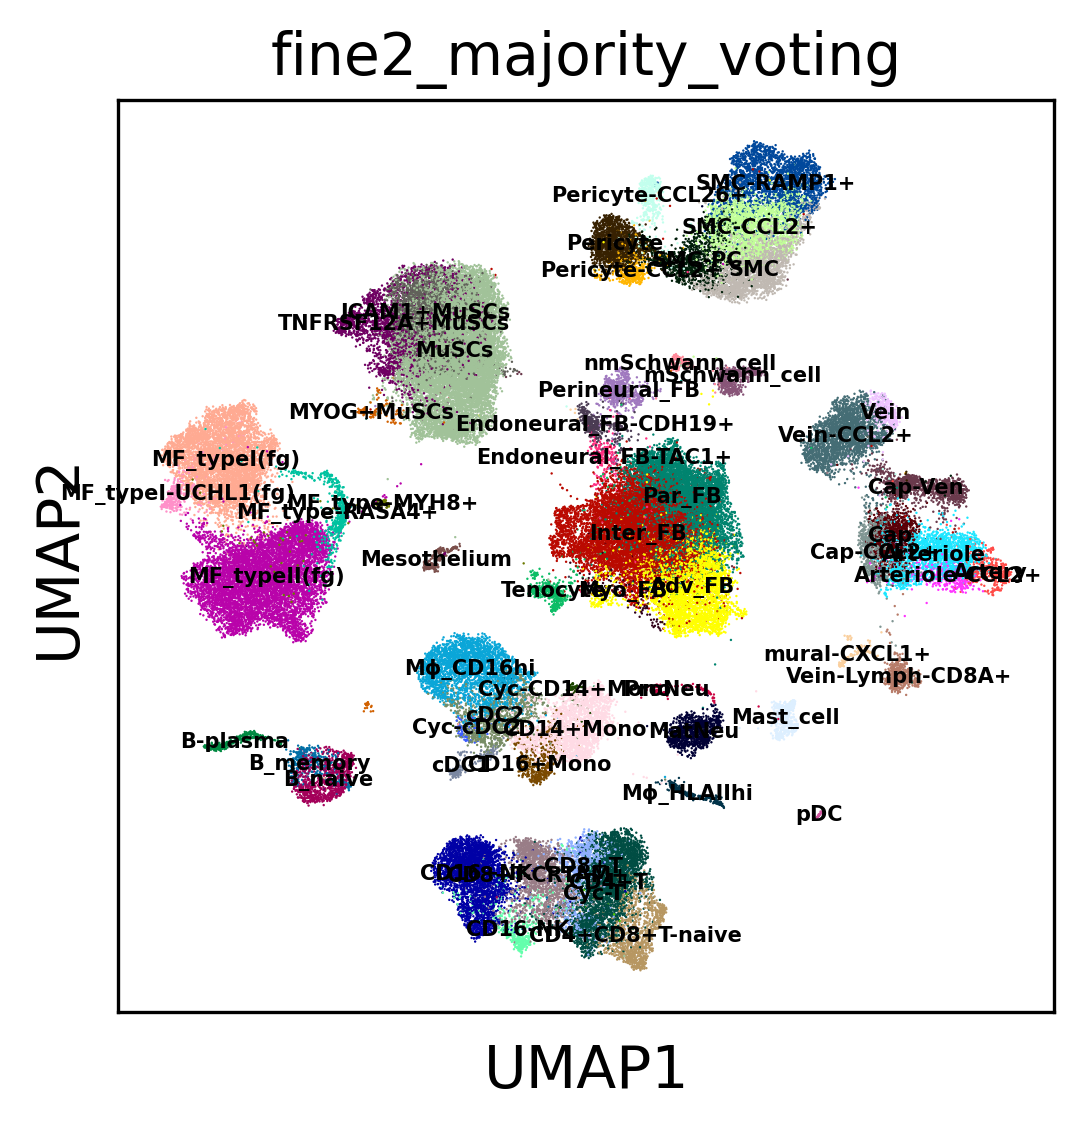

In [7]:
sc.pl.umap(adata,color=['fine2_majority_voting'],legend_fontsize=5,legend_loc='on data')

In [18]:
adata.obs['fine2_majority_voting'].value_counts()

AnnData object with n_obs × n_vars = 90784 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std', 'highly_va

In [16]:
collections.Counter(adata.obs['DonorID'])

Counter({'339C': 5014,
         '343B': 4240,
         '362C': 9190,
         '367C': 9525,
         '411C': 9258,
         '464C': 1891,
         '470BR': 12726,
         '582C': 4993,
         '583B': 10851,
         '591C': 6441,
         '621B': 4091,
         '640C': 12564})